# <center><font color='Purple' face='comic sans ms'> Salary Prediction</font></center>

<b>Problem on Hand: </b> Given a data set which  captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014 Predict the Salaries for Employees in Blatimore</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [ ]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='Magenta' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [ ]:
# Import the data set
salary_org = pd.read_csv("train.csv")

# Print top 5 rows of dataset
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='Magenta' face='Cursive'> Data Cleaning and Preparation</font>

In [ ]:
# Check the info of data set
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         11249 non-null  object
 1   JobTitle      11249 non-null  object
 2   AgencyID      11249 non-null  object
 3   Agency        11249 non-null  object
 4   HireDate      11178 non-null  object
 5   AnnualSalary  11248 non-null  object
 6   GrossPay      9392 non-null   object
dtypes: object(7)
memory usage: 615.3+ KB


 - <font color = 'Blue'> There are 18981 rows in the data set</font>
 - <font color = 'Blue'> There are 7 columns in the data set provided</font>
 - <font color = 'Blue'> All the columns are of type Object.</font>
 

<font color='Brown'> Its always a good practice to work on copy of data set instead of the Original Data set itself. Hence Creating a [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) of data set.</font>

In [ ]:
# Create a copy of data set
salary_cpy = salary_org.copy()

In [ ]:
# Check column names
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<font color='Brown'> Since Name has leading space lets remove it.</font>

In [ ]:
# Remove leading and trailing edges
salary_cpy.columns = salary_cpy.columns.str.strip()

# print coloumns after stripping spaces
print("After Removing leading and trailing spaces ",  salary_cpy.columns)

After Removing leading and trailing spaces  Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


The first and formost step before we jump into Analysis is Treating Null Values. So let us [Check Null](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) Values.

In [ ]:
# Check Null Values in data set
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          71
AnnualSalary       1
GrossPay        1857
dtype: int64

<font color = 'Blue'> There are null values in HireDate and GrossPay Columns. Let's work on each of them.</font>
<br>
<font color = 'Brown'> There are 70 null values in HireDate which is less than 1% of values so [dropping those rows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) .</font>

In [ ]:
# Remove rows having empty hire date
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

# Check null Values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        1856
dtype: int64

<font color = 'Blue'> There are no null values in HireDate Column.Moving on to GrossPay.</font><br>
<font color = 'Green'> Gross Pay is dependent on Annual salary. So these two are interrelated and only one of this can be used as dependent variable. As we have null values in GrossPay , [dropping that column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)</font>

In [ ]:
# Drop Gross Pay column
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

# Check null Values
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

<font color = 'Green'> Let us check [value counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) for all columns</font>

In [ ]:
# Value_counts for AgencyID
salary_cpy.AgencyID.value_counts()

P04001    183
C90786    166
W02629    115
P04002    108
A99416     90
         ... 
W02641      1
W02697      1
W02220      1
W02191      1
W02170      1
Name: AgencyID, Length: 1114, dtype: int64

<font color = 'Blue'>There are 1177 agencies in Blatimore. As per general Understanding AgencyID represents an Agency, so we should have same number of Agencies as well. Lets check the same</font>

In [ ]:
# Value_counts for Agency
salary_cpy.Agency.value_counts()

Youth Summer                 2575
Police Department            1810
Fire Department               913
DPW-Water & Waste Water       907
HLTH-Health Department        490
                             ... 
M-R Labor Commissioner          3
M-R Cable & Comm                2
Special City Services           2
HLTH-Heatlh Dept. Locatio       2
Legislative Reference           2
Name: Agency, Length: 65, dtype: int64

<font color = 'Blue'> Against general expectations, A single Agency seems to have different Agency ID's which might be given based on Job Role and Agency. Let's verify the Same </font>

In [ ]:
# Value_counts for JobTitle
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    2860
POLICE OFFICER                    1066
LABORER (Hourly)                   353
CROSSING GUARD                     206
EMT Firefighter Suppression        197
                                  ... 
LICENSED GRADUATE SOCIAL WORKE       1
ACCOUNTING SYSTEMS ANALYST           1
AUTOMOTIVE BODY SHOP SUPERVISO       1
INJURY PREVENTION SPECIALIST         1
CARE AIDE                            1
Name: JobTitle, Length: 888, dtype: int64

<font color = 'Blue'> There are 1073 Job title that are available</font>

In [ ]:
#Value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    830
06/10/2013    426
06/12/2012    327
06/07/2011    237
05/29/2014    210
             ... 
11/25/1999      1
04/13/2006      1
02/21/2001      1
08/24/2000      1
03/25/2010      1
Name: HireDate, Length: 3596, dtype: int64

 - <font color = 'Blue'> More number of people are selected on 05/21/2014</font>
 - <font color = 'Blue'> Date is of format MM/DD/YYYY </font>

In [ ]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

$11310.00     2857
$20800.00      195
$29245.00      102
$43999.00       94
$44773.00       91
              ... 
$44844.00        1
$63000.00        1
$61101.00        1
$41250.00        1
$100436.00       1
Name: AnnualSalary, Length: 1262, dtype: int64

 - <font color = 'Blue'> Annaul Salary has a dollar attached to it we will have to remove it and convert it ingto integer format</font>

In [ ]:
# Removing $ from Annual Salary and converting it into Integer format
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

11310.0     2857
20800.0      195
29245.0      102
43999.0       94
44773.0       91
            ... 
102100.0       1
74591.0        1
33199.0        1
45486.0        1
39934.0        1
Name: AnnualSalary, Length: 1262, dtype: int64

##### <font color = 'Red'> Now that we have modified Salary , lets also break the Date into year ,month and day </font>

In [ ]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

# Print info to check whether columns are added
salary_cpy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11178 entries, 0 to 11247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11178 non-null  object 
 1   JobTitle      11178 non-null  object 
 2   AgencyID      11178 non-null  object 
 3   Agency        11178 non-null  object 
 4   HireDate      11178 non-null  object 
 5   AnnualSalary  11178 non-null  float64
 6   HireDay       11178 non-null  int64  
 7   HireMonth     11178 non-null  int64  
 8   HireYear      11178 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 873.3+ KB


 <font color = 'Red'> Trimming all categorical columns to make sure there are no leading and trailing spacces and no double space between Words </font>

In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

<font color = 'Red'> It can also be seen that some of the job titles are in Upper case. so with Lowe and with mix of both which might effect analysis, so converting them to  uppercase and also converting  Agency and AgencyID</font>

In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

<font color = 'Red'> The last thing left in Data Preparation is Outlier Treatment. So lerts create [Box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for Annual Salary and check for Outliers </font>

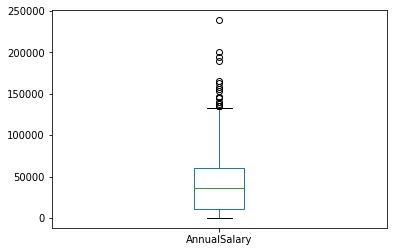

In [ ]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

- <font color = 'Blue'> There are few Salaries which are way far from other Salaries.</font>
- <font color = 'Blue'> They might effect the prediction. So we have to eliminate them</font><br><br>

<font color = 'Brown'> Lets Check the Summary Statistics as well </font>

In [ ]:
# SUMMARY STATS OF AnnualSalary
salary_cpy.AnnualSalary.describe()

count     11178.000000
mean      39454.164742
std       25107.553277
min           0.000000
25%       11310.000000
50%       35898.000000
75%       60004.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

As can be seen The max value way more than mean , median .

<font color = 'Brown'> Let's delete rows whose annual salary> 1500000 according to box plot</font>

In [ ]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.shape

(11169, 9)

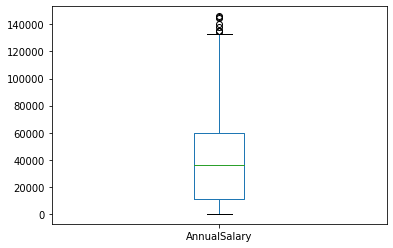

In [ ]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

All the data points above the 75% line are very close to each other so leaving it as is. <br><br> Now that we are done with Data Preparation lets move to next step

## <font color='Magenta' face='Cursive'>Exploratory Data Analysis</font>

<font color='Brown'> We will first check the distribution of of Annual Salary by creating a [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)</font>

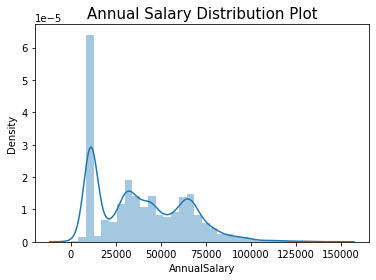

In [ ]:
# Check distribution of Target Variable
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()

 - <font color='Blue' face='Calibri'> The data is distributed very randomly and there seems to be not many peopel with salary more than 100000</font>

Let us check jobs for which people are being hired the most. For this we will be creating a [barplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

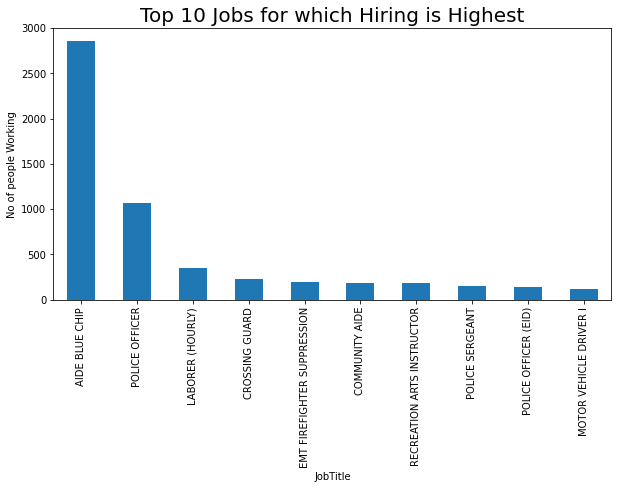

In [ ]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

- The above plot clearly shows more number of People are working as AIDE BLUE CHIP which  has over double the workers working as POLICE OFFICER which is second Highest
- All the remaining JobTitles have less than 1000 Workers 

<font color='Green'> Let us check the top 10 Jobs that fetch highest Salary </font>

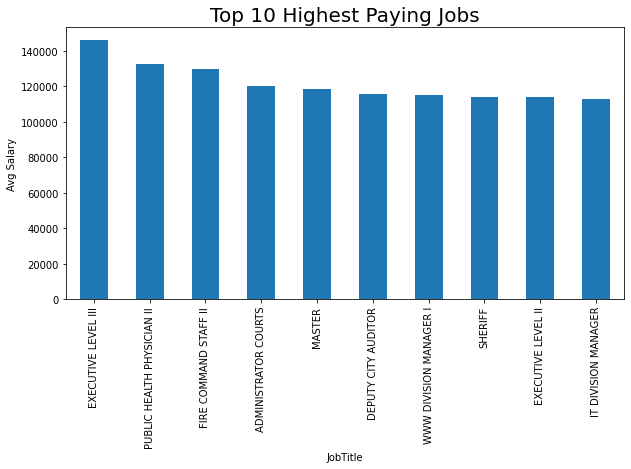

In [ ]:
#Top 10 Jobs that fetche highest Salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

 - The above plot clearly shows top 10 Jobs which fetch the highest Salary.

<font color='Brown'> Number of Jobs whose average pay is more thatn total average salary</font>

In [ ]:
# Find mean Slary
mean_sal = salary_cpy.AnnualSalary.mean()

# Number of Jobs paying more than mean salary
good_pay_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

653

- Out of 1073 Jobs 798 Jobs pay more than total average Salary

<font color='Green'> Let us check the top 10 Agencies and AgencyID with highest number of employees </font>

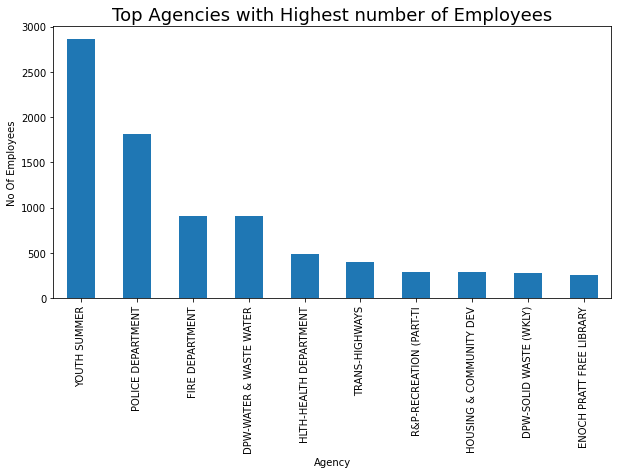

In [ ]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

 - The Youth Summer has maximum number of employees followed by Police Department
 - Fire Department and DPW - Water & Waste Water has almost same number of employees

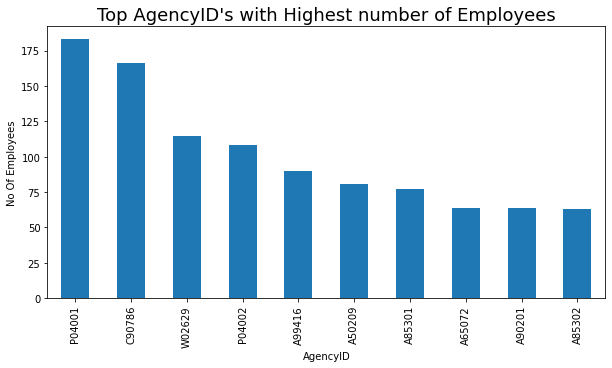

In [ ]:
#Top 10 Jobs that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()

 - The P04001 has maximum number of employees followed by C90786

<font color = 'Blue' > Let us check people hired in which year have lowest Salaries. This is to check if as the Hire Year increases the Salary decreases. Because, Salry is high for people who have high experience </font>

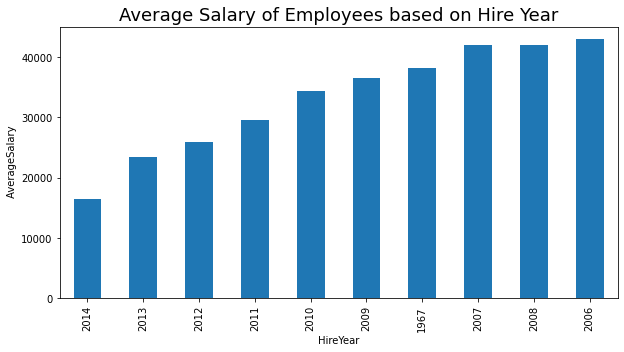

In [ ]:
# Salary vs Hire Year
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel(' AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()

 - The trend above Suggests that the Salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

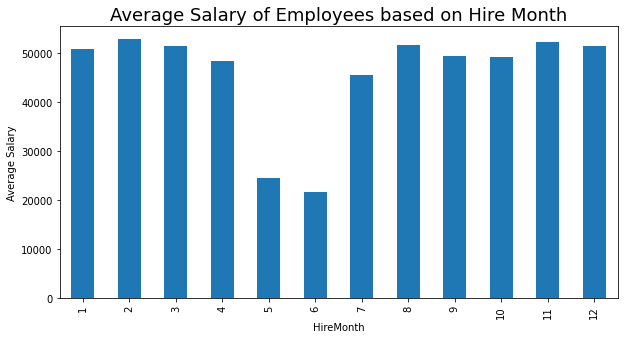

In [ ]:
# Checking if Month hired has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.show()

- Except in Months 5 and 6 the distribution is same throughout.
- This might be because big agencies donot hire during that time

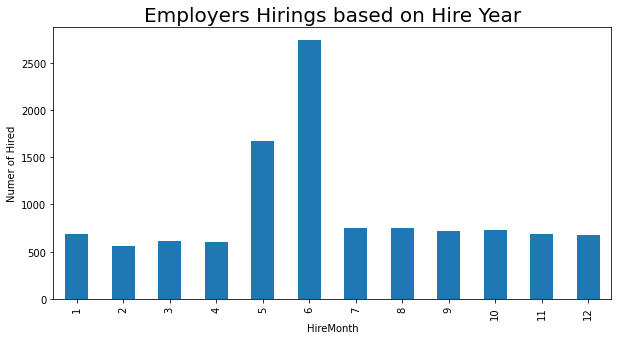

In [ ]:
# Checking on which Month most people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=20)
plt.show()

 -  More members are being hired in months of May and June but they have relatively lower average salaries

##### <font color = 'Red'> Lets check if there is any relation between any of the Numerical variables using [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html)</font>

<Figure size 1080x1440 with 0 Axes>

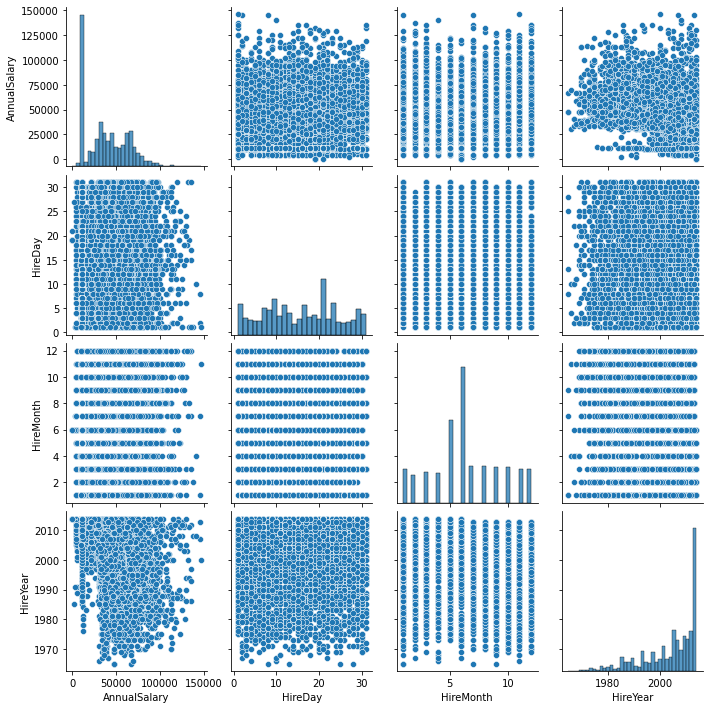

In [ ]:
# Plot a pair plot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

Nothing seems to have any [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Lets visualize correlation coefficients using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

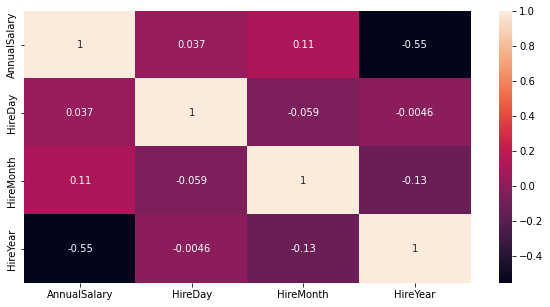

In [ ]:
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

Except for HireYear nothing seems to have significant correlation with Annual Salary

## <font color='Magenta' face='Cursive'> Feature Engineering</font>

Let us create a copy of data frame to do model building

In [ ]:
# Create a copy od data frame
salary_master = salary_cpy.copy()

 &nbsp; <font color='Black' face='cursive'> Linear Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called [feature encoding](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb). </font>
 

   <font color='Green' face='cursive'>Here We will be using Mean encoding. We are using Mean encoding as the number of labels of categorical variables are very high and so using others might either create unnecessary variables or labelling might not be that appropriate.</font>

In [ ]:
# Apply mean encoding for Job Title
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)

print(salary_master['JobTitle'])

0        11313.000000
1        48157.857143
2        69741.489362
3        60550.000000
4        44491.465909
             ...     
11243    30185.418605
11244    11313.000000
11245    60692.184803
11246    11313.000000
11247    11313.000000
Name: JobTitle, Length: 11169, dtype: float64


In [ ]:
# Apply mean encoding for Agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)

print(salary_master['Agency'])

0        11313.000000
1        51124.074468
2        63858.313364
3        38801.271429
4        61654.467920
             ...     
11243    33961.317073
11244    11313.000000
11245    61654.467920
11246    11313.000000
11247    11313.000000
Name: Agency, Length: 11169, dtype: float64


In [ ]:
# Apply mean encoding for AgencyID
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)

print(salary_master['AgencyID'])

0        11310.000000
1        46678.800000
2        69675.200000
3        47866.115385
4        43843.755556
             ...     
11243    33997.312500
11244    11310.000000
11245    69116.487805
11246    11310.000000
11247    11310.000000
Name: AgencyID, Length: 11169, dtype: float64


We have converted all the required categorical variables to Numerical variables. Lets check the info to check if trhere are any non-numeric variables

In [ ]:
# Check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11169 entries, 0 to 11247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11169 non-null  object 
 1   JobTitle      11169 non-null  float64
 2   AgencyID      11169 non-null  float64
 3   Agency        11169 non-null  float64
 4   HireDate      11169 non-null  object 
 5   AnnualSalary  11169 non-null  float64
 6   HireDay       11169 non-null  int64  
 7   HireMonth     11169 non-null  int64  
 8   HireYear      11169 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 872.6+ KB


 - <font color='Red' face='cursive'> Since we have HireYear, HireMonth and HireDay , we no longer require Date field</font>
 - <font color='Red' face='cursive'> And Annual Income is never based on Name, so it is safe to remove both those columns</font>

In [ ]:
# Drop Name, HireDate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

# Check Info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11169 entries, 0 to 11247
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      11169 non-null  float64
 1   AgencyID      11169 non-null  float64
 2   Agency        11169 non-null  float64
 3   AnnualSalary  11169 non-null  float64
 4   HireDay       11169 non-null  int64  
 5   HireMonth     11169 non-null  int64  
 6   HireYear      11169 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 698.1 KB


### <font color='#5234' face='Cursive'> Train Test Split</font>

#### Split data into train and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Split data into train and test sets
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=42)

 Check sizes of data to know whether they are split correctly

In [ ]:
# Shape of train set
print(salary_train.shape)

# Shape of test set
print(salary_test.shape)

(7818, 7)
(3351, 7)


#### <font color='Brown'> Seperate Dependent and Independent Variables using [pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html)</font>

In [ ]:
# Divide tarin set into Dependent and independent variables
y_train = salary_train.pop('AnnualSalary')

X_train = salary_train


# Divide test set into Dependent and independent variables
y_test = salary_test.pop('AnnualSalary')

X_test = salary_test

### <font color='#5234' face='Cursive'> Scaling</font>
 &nbsp; <font color='Green' face='cursive'>Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
<br><br>
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

#### Here we will be using  [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function of sklearn

In [ ]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,7.818000e+03,7.818000e+03,7.818000e+03,7.818000e+03,7.818000e+03,7.818000e+03
mean,-1.170151e-16,1.403045e-17,-2.836479e-16,9.234818e-17,-5.067434e-16,-7.258584e-15
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-1.512378e+00,-1.509780e+00,-1.527783e+00,-1.773992e+00,-1.823987e+00,-3.764226e+00
25%,-1.149677e+00,-1.251687e+00,-1.331035e+00,-6.966248e-01,-4.703138e-01,-5.829201e-01
50%,-1.441861e-01,2.738742e-02,1.282967e-01,2.162024e-02,-1.318957e-01,2.847088e-01
75%,8.788539e-01,8.946550e-01,1.062526e+00,7.398653e-01,8.833589e-01,8.631281e-01
max,4.383358e+00,4.202308e+00,2.279742e+00,1.817233e+00,1.898613e+00,9.595313e-01


In [ ]:
# # Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,0.005781,0.007704,0.005335,-0.024927,0.006966,0.024901
std,0.992888,0.999142,0.996856,1.009861,0.995100,0.975228
min,-1.414231,-1.509780,-1.381743,-1.773992,-1.823987,-3.764226
25%,-1.149677,-1.251687,-1.331035,-0.816332,-0.470314,-0.486517
50%,-0.127076,0.055173,0.128297,0.021620,-0.131896,0.284709
75%,0.878854,0.894655,1.062526,0.739865,0.544941,0.863128
max,3.709100,4.202308,2.279742,1.817233,1.898613,0.959531


### <font color='#5234' face='Cursive'> Model Building</font>

#### We are building a [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model for this project

 &nbsp; <font color='Green' face='cursive'>Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. This is used for predicting the independent variables based on relationship between dependent and independent variables.<br>
    It is a Supervised Learning Technique i.e., it requires historic data to form a relationship.<br><br>
There are two types of Linear Regression:<br>
    1. Simple Linear Regression<br>
    2. Multiple Linear Regression<br><br>
    1.<u><font color='Red' face='cursive'>Simple Linear Regression:</font></u> It predicts a response using a single feature. The assumption in Simple Linear Regression is that the two variables are linearly related.<br>
    <center><font color='Brown'>   h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub><br></font></center>
    2.<u><font color='Red' face='cursive'>Multiple Linear Regression:</font></u>It is the extension of simple linear regression that predicts a response using two or more features. Mathematically we can explain it as follows −

Consider a dataset having n observations, p features i.e. independent variables and y as one response i.e. dependent variable the regression line for p features can be calculated as follows −
    <center> <font color='Brown'>  h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub>+ b<sub>2</sub>.x<sub>i2</sub> +..........+ b<sub>p</sub>.x<sub>ip</sub><br></font></center>
   
Here, h(xi) is the predicted response value and b0,b1,b2…,bp are the regression coefficients.

#### Let's see how a Linear Regression Works

In [ ]:
# A sample Data Frame
example_df = pd.DataFrame({'Performance' : [1,2,3,4,5,6], 'Grade':[2,5,4,6,1,3],'Target':[100,300,200,600,200,600]})
example_df

,Performance,Grade,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,600


<font color='Blue' face='Cursive'>Let's take an example Salary prediction for hiring employees, and the salary that would be offered is the Target based on independent variables Performance which is performance in the interview and Grade being the Job Grade thaey are being hired for.</font>

<font color='Indigo' face='Cursive'>As discussed Earlier, we have to find relationship between the dependent and independent variables, which is quite easy as we have packages to do the same. Lets build a model to predict Salaries.</font>

In [ ]:
# Create a model by creating a Linear Regression Object
example_lr = LinearRegression()

example_model = example_lr.fit(example_df[['Performance','Grade']],example_df['Target'])

<font color='Indigo' face='Cursive'>Now that the model is built let us check the coefficients and Intercept</font>

In [ ]:
# Lets have a look at coefficients as described
print(example_lr.coef_)
print(example_lr.intercept_)

[85. 75.]
-226.66666666666669


<font color='Indigo' face='Cursive'> It is now understood that the model is generated and its equation can be defined as </font>
   <font color='brown' face='Cursive'> -226.667 + 85*Performance + 75 * Grade </font>

<font color='Blue' face='Cursive'> But how well/ accurate is the predicted values of the model. For any Linear regression model, we generally use R<sup>2</sup> to find the same</font>

<u><font color='Red' face='cursive'>R-squared</font></u> <font color='green' face='Cursive'>R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.So we haave to [calculate R-Squared](https://www.k2analytics.co.in/r-squared-in-linear-regression/) for the same<br></font>

<font color='Indigo' face='Cursive'> However this made easy by sklearn and can be calculated as below </font>

In [ ]:
# Calculate R-squared
example_model.score(example_df[['Performance','Grade']],example_df['Target'])

0.8271428571428572

<font color='Blue' face='Cursive'> So the model we created is able to predict the results with an accuracy of 82%</font>

<font color='Indigo' face='Cursive'> But that's not all.. we have to verify if our model satisfies  [assumptions of Linear Regression](https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/).</font>

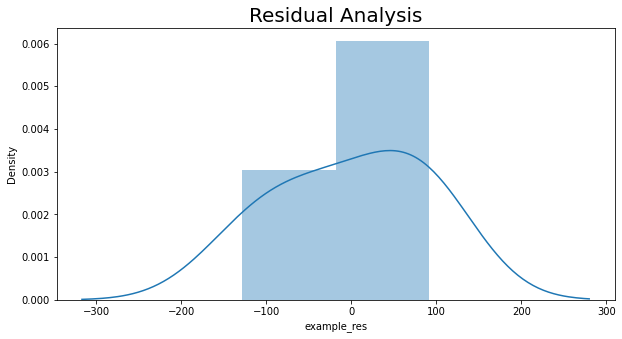

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
target_pred = example_model.predict(example_df[['Performance','Grade']])
example_res = example_df['Target'] - target_pred
sns.distplot(example_res)
plt.xlabel('example_res')
plt.title("Residual Analysis",fontsize=20)
plt.show()

As can be seen Error Terms are Normally Distributed

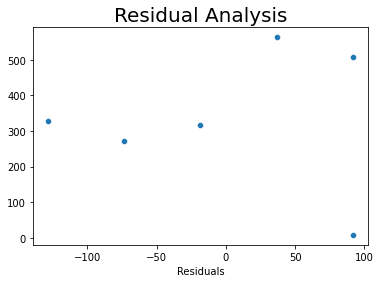

In [ ]:
sns.scatterplot(x=example_res,y=target_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

And there is no specific relation and are independent of each other

##### <font color='Indigo' face='Cursive'> Lets use the same to build our Model</font>

#### Generate a Linear Regression model by passing the X_train and y_train as inputs

In [ ]:
# Build the model
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

Let us check the R-squared

In [ ]:
# Verify the r2 score
salary_reg.score(X_train,y_train)

0.9674006678667134

##### <font color='Indigo' face='Cursive'> We got a very high value for R-squared which is very close to 1, which means the independent variables are able to expalin 96% of  variance in the dependent variable.</font>

### <font color='#5234' face='Cursive'> Model Evaluation</font>

##### <font color='Red' face='Cursive'> Even though our model performs well on train data, that doesn't mean the model is a good model. The model should perform equally good on the test data as well, i.e., data the model has not encountered till now.</font>

##### <font color='Blue' face='Cursive'> So lets check how model performs on test data</font>

In [ ]:
# r2 for test data
salary_reg.score(X_test,y_test)

0.9658868190612355

##### <font color='Indigo' face='Cursive'> The model performs well on the test data as well giving an R-squared of 0.963, which indicates the model generated is a good model and can be used for predicting the Salaries of Employees in Baltimore</font>

##### <font color='Red' face='Cursive'><u> Note: </u></font> 
- <font color='Green' face='Cursive'> Here we did not face any issue of [Overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) even though we used all the columns. But in most models using all the columns will lead to Overfitting, which can be addressed by [Regularization](https://medium.com/analytics-vidhya/lasso-and-ridge-the-regularized-linear-regression-2d85384badf3).</font>


#### Let's plot distribution plot to check whether Residuals satisfy [assumptions of Linear Regression](https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/)

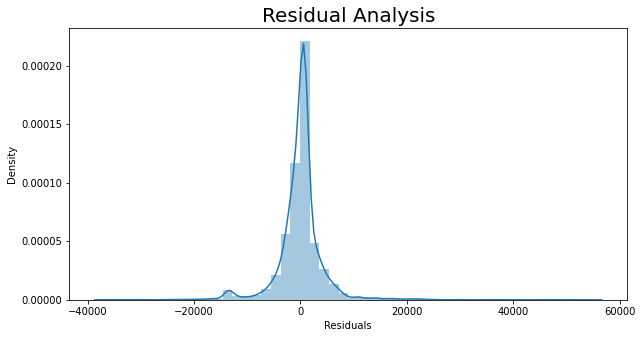

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression

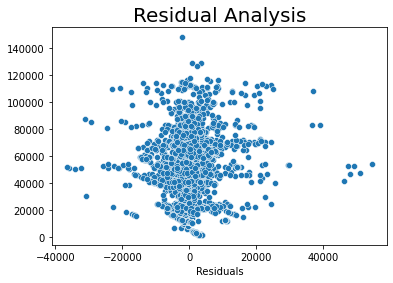

In [ ]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residuals are independent of each other ,which is another assumption in Linear Regression

##### <font color='Indigo' face='Cursive'> The model has generated can be used for Salary prediction .Let us check the coefficients and intercept </font>

In [ ]:
# Print coef
print("Coef are:",salary_reg.coef_)

#print intercept
print("Intercept is",salary_reg.intercept_)

Coef are: [21971.73688466  3018.68061273 -1625.92732801   -25.06959828
  -159.35002558 -2154.10473627]
Intercept is 39338.0883832182


##### <font color='Indigo' face='Cursive'> Let us create a model equation and store it in a string</font>

In [ ]:
model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

39338.0883832182 + 21971.736884663074 * JobTitle + 3018.680612730347 * AgencyID + -1625.9273280118643 * Agency + -25.069598283714583 * HireDay + -159.3500255832736 * HireMonth + -2154.1047362717854 * HireYear


#### <i><font color='Red' face='Cursive'>Observations from Model:</font></i>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.